In [ ]:
import pandas as pd
import os
import glob
import numpy as np
import geopandas as gpd  
  
# use glob to get all the csv files 
# in the folder
path = r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\ReportCardData'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
for f in result:
      
    # read the csv file
    df = pd.read_csv(f)
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

In [ ]:
dataframes =[]

for f in result:
      
    # read the csv file
    df = pd.read_csv(f)
    dataframes.append(df)
    
print(dataframes)

In [ ]:
dataframes[0]

In [ ]:
act_district = dataframes[0].replace('*', np.nan)
act_district

In [ ]:
cols = act_district.columns.drop({'district_name', 'subgroup'})

act_district[cols] = act_district[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
act_district.info()

In [ ]:
districts = gpd.read_file(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\EDGE_SCHOOLDISTRICT_TL20_SY1920\EDGE_SCHOOLDISTRICT_TL20_SY1920.shp')

In [ ]:
districts.plot()

In [ ]:
districts

In [ ]:
tn_districts = districts.loc[districts['STATEFP'] == '47']
#took some googling to find

In [ ]:
tn_districts.plot()

In [ ]:
tn_districts['NAME'].sort_values().reset_index()

In [ ]:
tn_districts[tn_districts['NAME'].str.contains('in')]

Cool. Now, how do I merge this with the other documents?

In [ ]:
collist = ['District', 'Year', 'Licensed Educators', 'Instructional Personnel', 'Classroom Teacher', 'Principal', 'Superintendent']

salaries_2020 = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\avg_salaries_2020.csv', nrows=142, usecols=collist)

In [ ]:
collist = ['District', 'Year', 'Licensed Educators', 'Instructional Personnel', 'Classroom Teacher', 'Principal', 'Superintendent']

salaries_2019 = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\avg_salaries_2019.csv', nrows=142, usecols=collist)

In [ ]:
collist = ['District', 'Year', 'Licensed Educators', 'Instructional Personnel', 'Classroom Teacher', 'Principal', 'Superintendent']

salaries_2018 = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\avg_salaries_2018.csv', nrows=142, usecols=collist)

In [ ]:
s = salaries_2020.append(salaries_2019, ignore_index=True)
salaries_all = s.append(salaries_2018, ignore_index=True)

In [ ]:
cols = salaries_all.columns.drop({'District'})

salaries_all[cols] = salaries_all[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
salaries_all['District'] = salaries_all['District'].astype(str)

In [ ]:
salaries_all

In [ ]:
salaries_all['District'] = salaries_all['District'] + ' School District'

In [ ]:
salaries_all

In [ ]:
rep = {'Alamo School District': 'Alamo City School District', 
       'Alcoa School District': 'Alcoa City School District', 
       'Arlington School District': 'Arlington Community School District',
      'Athens School District': 'Athens City Schools',
      'Bartlett School District': 'Bartlett City School District',
      'Bells School District': 'Bells City School District',
      'Bradford School District': 'Bradford Special School District',
      'Bristol School District': 'Bristol City School District',
      'Cleveland School District': 'Cleveland City School District',
      'Clinton School District': 'Clinton City School District',
      'Dayton School District': 'Dayton City Elementary School District',
      'Dyersburg School District': 'Dyersburg City School District',
      'Elizabethton School District': 'Elizabethton City School District',
      'Etowah School District': 'Etowah City School District',
      'Fayetteville School District': 'Fayetteville City School District',
      'Franklin School District': 'Franklin Special School District',
      'Germantown School District': 'Germantown Municipal School District',
      'Greeneville School District': 'Greeneville City School District',
      'Hollow Rock - Bruceton School District': 'Hollow Rock-Bruceton Special School District',
      'Humboldt School District': 'Humboldt City School District',
      'Huntingdon School District': 'Huntingdon Special School District',
      'Kingsport School District': 'Kingsport City School District',
      'Lakeland School District': 'Lakeland School System District',
      'Lebanon School District': 'Lebanon Special School District',
      'Lexington School District': 'Lexington City School District',
      'Manchester School District': 'Manchester City School District',
      'Maryville School District': 'Maryville City School District',
      'Mckenzie School District': 'McKenzie Special School District',
      'Milan School District': 'Milan Special School District',
      'Millington School District': 'Millington Municipal School District',
      'Murfreesboro School District': 'Murfreesboro City School District',
      'Newport School District': 'Newport City School District',
      'Oak Ridge School District': 'Oak Ridge City School District',
      'Oneida School District': 'Oneida Special School District',
      'Paris School District': 'Paris Special School District',
      'Richard City School District': 'Richard City Special School District',
      'Rogersville School District': 'Rogersville City Schools',
      'South Carroll School District': 'South Carroll Special School District',
      'Sweetwater School District': 'Sweetwater City School District',
      'Trenton School District': 'Trenton Special School District',
      'Tullahoma School District': 'Tullahoma City School District',
      'West Carroll Sp Dist School District': 'West Carroll Special District',
      'Countycke County School District': 'Cocke County School District',
      'Countyffee County School District': 'Coffee County School District',
      'Countyllierville School District': 'Collierville School District',
      'Mcminn County School District': 'McMinn County School District',
      'Mcnairy County School District': 'McNairy County School District',
      'Fayette County Public Schools School District': 'Fayette County School District',
      'Madison County School District': 'Jackson-Madison County School System',
      'Montgomery County School District': 'Clarksville-Montgomery County School System',
      'Hardeman County Schools School District': 'Hardeman County School District',
      'Gibson County. Spec. School District': 'Gibson County School District',
      'Davidson County School District':'Metropolitan Nashville Public School District',
      'Dekalb County School District': 'DeKalb County School District'}

salaries_all = salaries_all.replace(rep)

In [ ]:
salaries_all = salaries_all[salaries_all.District != 'State Average School District']

In [ ]:
salaries_all.loc[salaries_all.District.isin(['Anderson County School District', 'Arlington Community School District', 'Cocke County School District', 'Coffee County School District', 'Crockett County School District', 'Hawkins County School District', 'Henderson County School District', 'Henry County School District', 'McMinn County School District', 'Monroe County School District', 'Rhea County School District', 'Rutherford County School District', 'Williamson County School District', 'Wilson County School District'])]

In [ ]:
collist = ['District', 'Year', 'Licensed Educators', 'Instructional Personnel', 'Classroom Teacher', 'Principal', 'Superintendent']

add_sal_rows = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\salaries_special.csv', usecols=collist)

In [ ]:
salaries_all = salaries_all.append(add_sal_rows, ignore_index=True)

In [ ]:
salaries_all

In [ ]:
salaries_all.to_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\all_salary_years.csv')

In [ ]:
#act_district_gen_2020 = act_district.loc[act_district['subgroup'] == 'All Students']

In [ ]:
grad_rate_2020 = dataframes[11].replace('*', np.nan)

In [ ]:
#grad_rate_2020 = grad_rate_2020.loc[grad_rate_2020['subgroup'] == 'All Students']

Note: I decided I wanted all subgroups rather than only the all students subgroup. Repurposing some cells.

In [ ]:
grad_rate_2020

In [ ]:
dist_perf_2020 = act_district.merge(grad_rate_2020, how='left', on='district_number')

In [ ]:
finance_2020 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\2019-20-finance_update.csv")

In [ ]:
finance_2020 = finance_2020.loc[finance_2020['School Name'] == 'District Average/Total']

In [ ]:
tvaas_2019 = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\tvaas_district_composite.csv')

In [ ]:
#i need to get the proper names of the districts

dist_perf_2020 = tvaas_2019.merge(dist_perf_2020, how='left', left_on='District Number', right_on='district_number').drop(columns={'Overall Composite', 'Literacy Composite', 'Numeracy Composite', 'Literacy and Numeracy Composite', 'Social Studies Composite', 'district_name_x', 'district_name_y'})

In [ ]:
dist_perf_2020

## Now, for 2019

In [ ]:
act_2019 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\ACT.csv")

In [ ]:
act_2019_all = act_2019.loc[act_2019['school_name'] == 'All Schools']

In [ ]:
act_2019_all

In [ ]:
#act_2019_gen = act_2019_all.loc[act_2019_all['subgroup'] == 'all_students']

In [ ]:
#act_2019_gen

In [ ]:
grad_rate_2019 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\grad_rate.csv")

In [ ]:
grad_rate_2019_all = grad_rate_2019.loc[grad_rate_2019['school_name'] == 'All Schools']

In [ ]:
finance_2019 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\FinalReportCarddata2018201921.csv", nrows=143)

In [ ]:
#grad_rate_2019_gen = grad_rate_2019_all.loc[grad_rate_2019_all['subgroup'] == 'all_students']

In [ ]:
dist_perf_2019 = act_2019_all.merge(grad_rate_2019_all, how='left', on='district_number')

In [ ]:
dist_perf_2019

In [ ]:
dist_perf_2019 = tvaas_2019.merge(dist_perf_2019, how='left', left_on='District Number', right_on='district_number')

In [ ]:
dist_perf_2019

## Now for 2018

In [ ]:
act_2018 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\ACT_2018.csv")

In [ ]:
grad_rate_2018 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\grad_rate_2018.csv")

In [ ]:
tvaas_2018 = pd.read_csv(r"C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\data_2018_TVAAS_District_Composite.csv")

In [ ]:
act_2018['school_name'].fillna('All Students', inplace=True)

In [ ]:
act_2018_all = act_2018.loc[act_2018['school_name'] == 'All Students']

In [ ]:
#act_2018_gen = act_2018_all.loc[act_2018_all['subgroup'] == 'All Students']

In [ ]:
grad_rate_2018['school_name'].fillna('All Students', inplace=True)

In [ ]:
grad_rate_2018_all = grad_rate_2018.loc[grad_rate_2018['school_name'] == 'All Students']

In [ ]:
#grad_rate_2018_gen = grad_rate_2018_all.loc[grad_rate_2018_all['subgroup'] == 'All Students']

In [ ]:
dist_perf_2018 = act_2018_all.merge(grad_rate_2018_all, how='left', on='district_number')

In [ ]:
dist_perf_2018 = tvaas_2018.merge(dist_perf_2018, how='left', left_on='District Number', right_on='district_number')

## Now, to do some combining

In [ ]:
dist_perf_2018.drop(columns={'year_x', 'year_y'})

In [ ]:
dist_perf_2018['Year'] = 2018

In [ ]:
dist_perf_2018

In [ ]:
dist_perf_2019.drop(columns={'year_x', 'year_y'})

In [ ]:
dist_perf_2019['Year'] = 2019

In [ ]:
perf_18_19 = dist_perf_2019.append(dist_perf_2018)

In [ ]:
perf_18_19 = perf_18_19.drop(columns={'year_y', 'subgroup_y'})

In [ ]:
perf_18_19 = perf_18_19.drop(columns={'percent_21_orhigher', 'avg_composite_baseline_year', 'avg_composite_previous', 'percent_21_orhigher_baseline_year', 'percent_21_orhigher_previous'})

In [ ]:
perf_18_19 = perf_18_19.drop(columns={'percent_met_crb_english', 'percent_met_crb_math', 'percent_met_crb_reading', 'percent_met_crb_science', 'percent_met_all4_crb'})

In [ ]:
perf_18_19 = perf_18_19.drop(columns={'district_name_x', 'school_number_x', 'school_name_x', 'year_x', 'district_name_y', 'school_number_y', 'school_name_y', 'denominator', 'grad_rate_previous', 'baseline_year', 'Science Composite'})

In [ ]:
perf_18_19.info()

In [ ]:
dist_perf_2020 = dist_perf_2020.drop(columns={'subgroup_y', 'district_number', 'graduation cohort', 'graduation count', 'valid_tests'})

In [ ]:
dist_perf_2020 = dist_perf_2020.drop(columns={'number_scoring_21_or_higher', 'percent_scoring_21_or_higher', 'number_scoring_below_19', 'percent_scoring_below_19'})

In [ ]:
dist_perf_2020.info()

In [ ]:
dist_perf_2020 = dist_perf_2020.rename(columns={'average_english_score':'english_avg', 'average_math_score':'math_avg', 'average_reading_score':'reading_avg', 'average_science_score':'science_avg', 'average_composite_score':'act_composite_avg', 'year': 'Year', 'graduation rate':'grad_rate'})

In [ ]:
perf_18_19.to_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\perf_18_19.csv')

In [ ]:
dist_perf_2020.to_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\perf_2020.csv')

In [ ]:
tvaas = tvaas_2019.append(tvaas_2018).reset_index()

In [ ]:
tvaas.to_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\tvaas.csv')

In [ ]:
finance_2019.info()

In [ ]:
finance_2019['Federal Percentage'] = list(map(lambda x: x[:-1], finance_2019['Federal Percentage'].values))
finance_2019['State Percentage'] = list(map(lambda x: x[:-1], finance_2019['State Percentage'].values))
finance_2019['Local Percentage'] = list(map(lambda x: x[:-1], finance_2019['Local Percentage'].values))

In [ ]:
finance_2019['Federal Percentage'] = [float(x) for x in finance_2019['Federal Percentage'].values]
finance_2019['State Percentage'] = [float(x) for x in finance_2019['State Percentage'].values]
finance_2019['Local Percentage'] = [float(x) for x in finance_2019['Local Percentage'].values]

In [ ]:
finance_2019['State and Local Percentage'] = finance_2019['State Percentage'] + finance_2019['Local Percentage']

In [ ]:
finance_2019 = finance_2019.drop(columns={'State Percentage', 'Local Percentage'})

In [ ]:
finance_2019.info()

In [ ]:
cols = finance_2019.columns
finance_2019[cols] = finance_2019[cols].replace({r'\$':''}, regex = True)

In [ ]:
finance_2019 = finance_2019.rename(columns={'Distrist Level Federal Per Pupil Expenditures':'District Level Federal Per Pupil Expenditures'})

In [ ]:
finance_2019 = tvaas_2019.merge(finance_2019, how='left', left_on='District Number', right_on='District ID').drop(columns={'Overall Composite', 'Social Studies Composite','Literacy Composite', 'Numeracy Composite', 'Literacy and Numeracy Composite', 'District Name_y', 'School ID', 'Key', 'Dist', 'District ID'}).rename(columns={'District Name_x':'District Name'})

In [ ]:
finance_2020 = tvaas_2019.merge(finance_2020, how='left', left_on='District Number', right_on='District ID').drop(columns={'Overall Composite', 'Social Studies Composite','Literacy Composite', 'Numeracy Composite', 'Literacy and Numeracy Composite', 'District Name_y', 'School ID', 'Key', 'Dist', 'District ID'}).rename(columns={'District Name_x':'District Name'})

In [ ]:
finance_2020['Year'] = 2020

In [ ]:
finance_all = finance_2020.append(finance_2019).reset_index()

In [ ]:
finance_all = finance_all.drop(columns={'School Nutrition Percentage'})

In [ ]:
finance_all.to_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\finance_all.csv')

In [152]:
finance_all

,index,District Number,District Name,Year,School Name,Enrollment,School Level Federal Per Pupil Expenditures,School Level State and Local Per Pupil Expenditures,School Level School Nutrition Per Pupil Expenditures,Total School Level Per Pupil Expenditures,Distrist Level Federal Per Pupil Expenditures,District Level State and Local Per Pupil Expenditures,District Level School Nutrition Per Pupil Expenditures,Total District Level Per Pupil Expenditures,Total School Per Pupil Expenditures,Total Expenditures Per School,Federal Percentage,State and Local Percentage,District Level Federal Per Pupil Expenditures
0,0,171,Alamo City School District,2020,District Average/Total,575.0,548.74,6667.91,721.59,7938.24,172.49,1190.05,0.0,1362.55,9300.79,9300.79,7.75%,84.49%,NaN
1,1,51,Alcoa City School District,2020,District Average/Total,2075.0,320.44,7821.36,476.34,8618.15,40.12,2821.74,58.45,2920.3,11538.45,11538.45,3.12%,92.24%,NaN
2,2,10,Anderson County School District,2020,District Average/Total,6141.0,278.41,5991.96,465.22,6735.59,386.22,3269.57,49.07,3704.87,10440.46,10440.46,6.37%,88.71%,NaN
3,3,793,Arlington Community School District,2020,District Average/Total,4778.0,281.09,6278.5,205.42,6765.0,144.21,1955.43,16.69,2116.33,8881.33,8881.33,4.79%,92.71%,NaN
4,4,541,Athens City Schools,2020,District Average/Total,1628.0,497.55,6423.36,681.12,7602.03,289.20,2068.59,123.05,2480.84,10082.87,10082.87,7.80%,84.22%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,135,920,Weakley County School District,2019,District Average/Total,3982.0,471.43,"5,457.18",554.12,"6,482.73",NaN,"2,002.80",114.71,"2,305.78","8,788.50","8,788.50",12.83539,87.16461,188.26
276,136,97,West Carroll Special District,2019,District Average/Total,867.0,485.47,"5,922.47",800.92,"7,208.86",NaN,"1,843.68",0.00,"2,125.99","9,334.86","9,334.86",13.5675,86.4325,282.31
277,137,930,White County School District,2019,District Average/Total,3768.0,349.68,"5,522.47",643.63,"6,515.78",NaN,"1,990.33",0.89,"2,307.17","8,822.95","8,822.95",14.75128,85.24873,315.95
278,138,940,Williamson County School District,2019,District Average/Total,39828.0,129.66,"6,353.67",287.61,"6,770.94",NaN,"2,291.44",57.47,"2,420.35","9,191.29","9,191.29",2.83452,97.16548,71.45


In [154]:
us_salaries = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\us_salaries.csv')

In [158]:
us_salaries

,State,Year,Salary($)
0,Alabama,2020,"54,095"
1,Alaska,2020,"72,010"
2,Arizona,2020,"50,782"
3,Arkansas,2020,"50,456"
4,California,2020,"84,531"
...,...,...,...
97,Virginia,2019,"54,986"
98,Washington,2019,"73,049"
99,West Virginia,2019,"47,681"
100,Wisconsin,2019,"58,277"


In [178]:
cost_living = pd.read_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\csvData.csv')

In [179]:
cost_living

,State,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,Mississippi,86.1,93.2,666.0,92.3,89.1,91.4
1,Arkansas,86.9,92.5,75.6,90.7,91.0,97.4
2,Oklahoma,87.0,94.6,73.0,93.4,92.5,93.5
3,Missouri,87.1,95.4,78.3,96.3,90.4,95.8
4,New Mexico,87.5,94.6,84.4,89.9,98.5,91.9
5,Tennessee,88.7,93.0,79.4,91.7,8.6,92.9
6,Michigan,88.9,91.0,80.2,98.5,101.8,96.4
7,Kansas,89.0,92.6,70.0,100.1,95.4,90.3
8,Georgia,89.2,96.3,74.3,90.3,95.7,96.6
9,Wyoming,89.3,103.5,81.7,87.4,94.5,105.5


In [181]:
cost_sal_state = us_salaries.merge(cost_living, how='left', on='State')

In [186]:
cost_sal_state.to_csv(r'C:\Users\chris\Documents\nss-data-analytics\projects\Nashville-Education-Data\data\salaries_cost.csv')

<BarContainer object of 102 artists>

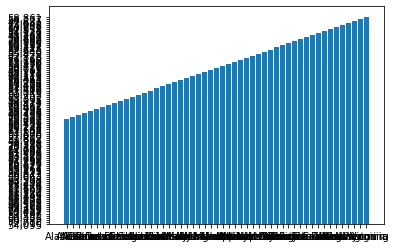

In [187]:
state = cost_sal_state['State']
sal = cost_sal_state['Salary($)']

plt.bar(state, sal)